<a href="https://colab.research.google.com/github/Udit-Kalra-1117/Statistical-Data-Visualization-on-Breast-Cancer-Diagnosis-Dataset/blob/main/Statistical_Data_Visualization_with_Seaborn_of_Breast_Cancer_Diagnosis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERFORMING EXPLORATORY DATA ANALYSIS USING SEABORN ON BREAST CANCER DIAGNOSIS DATASET**

# **STEP 1: LOADING LIBRARIES AND DATA**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Breast Cancer Wisconsin (Diagnostic) Data Set.csv to Breast Cancer Wisconsin (Diagnostic) Data Set.csv


In [4]:
data = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set.csv')

# **EXPLORATORY DATA ANALYSIS**


# **STEP 2: SEPARATE TARGET FROM FEATURES**

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
y = data.diagnosis
drop_cols = ['Unnamed: 32','id','diagnosis']
x = data.drop(drop_cols, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **STEP 3: PLOT DIAGNOSIS DISTRIBUTION**

Number of Benign Tumors: 357
Number of Malignant Tumors: 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


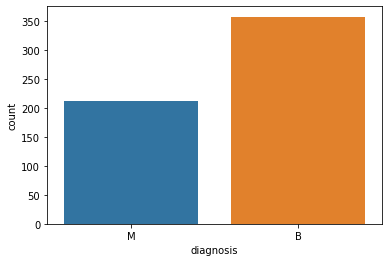

In [8]:
ax = sns.countplot(y, label="Count")
B, M = y.value_counts()
print("Number of Benign Tumors:", B)
print("Number of Malignant Tumors:", M)

In [9]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **DATA VISUALIZATION**

# **STEP 4: VISUALIZING STANDARDISED DATA WITH SEABORN**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

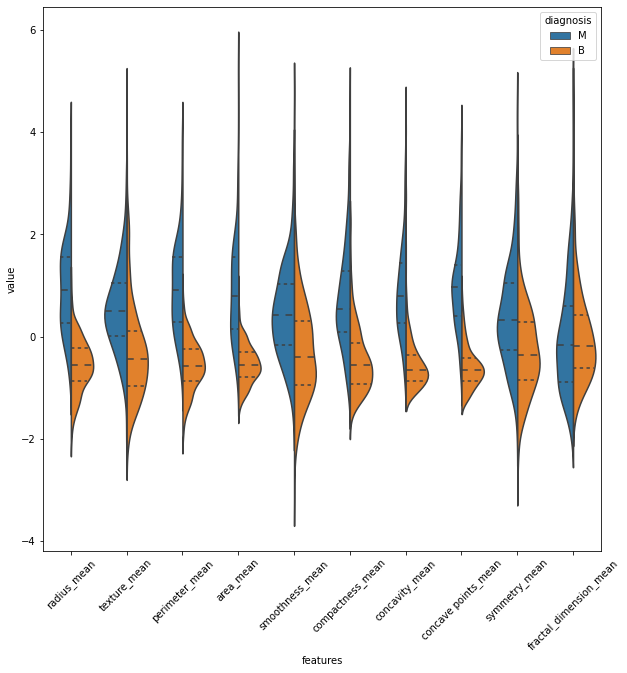

In [10]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45)

# **STEP 5: VIOLIN PLOTS AND BOX PLOTS**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

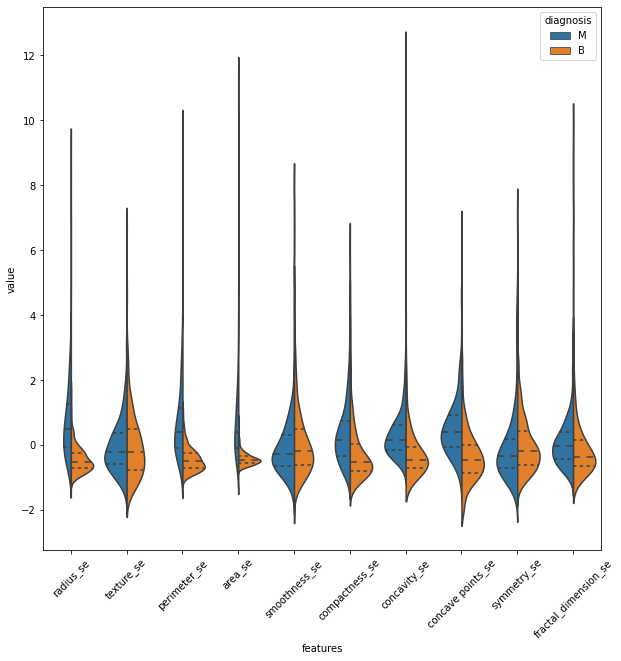

In [11]:
data = pd.concat([y, data_std.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

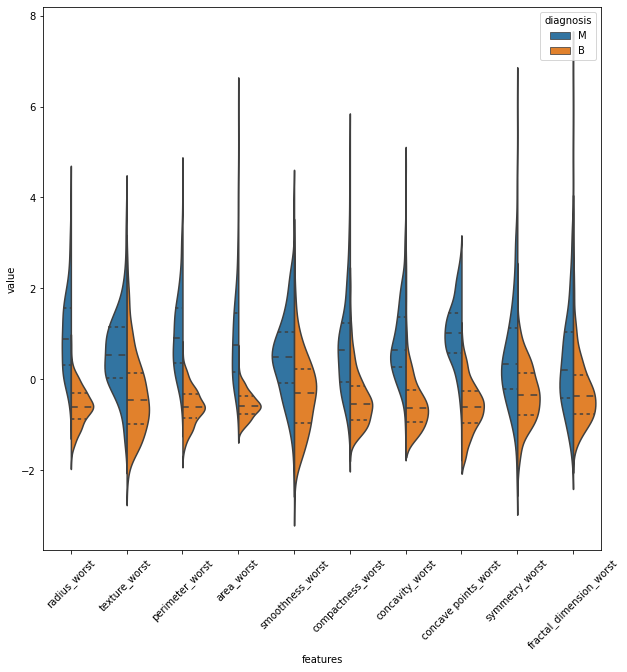

In [12]:
data = pd.concat([y, data_std.iloc[:, 20:30]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

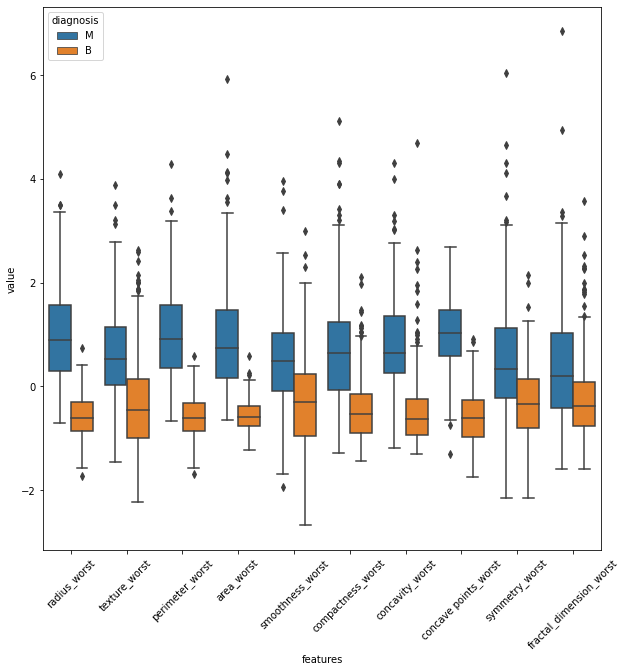

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

# **STEP 6: USING JOINT PLOTS FOR FEATURE COMPARISON**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


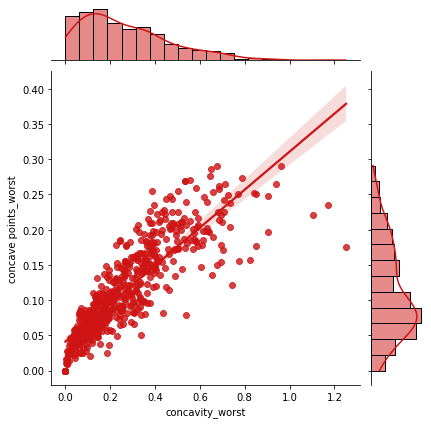

In [14]:
sns.jointplot(x.loc[:, 'concavity_worst'],
              x.loc[:, 'concave points_worst'],
              kind='reg',
              color='#ce1414')

# **STEP 7: OBSERVING THE DISTRIBUTION OF VALUES AND THEIR VARIANCE WITH SWARM PLOTS**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

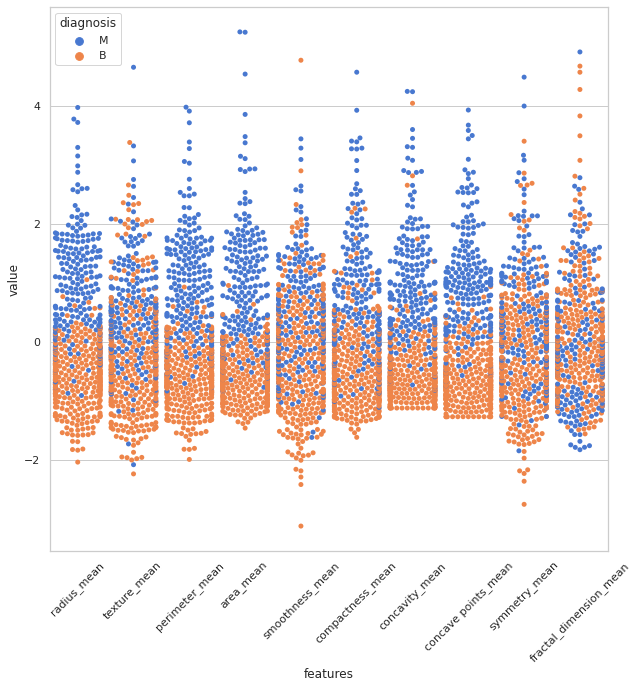

In [15]:
sns.set(style='whitegrid', palette='muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

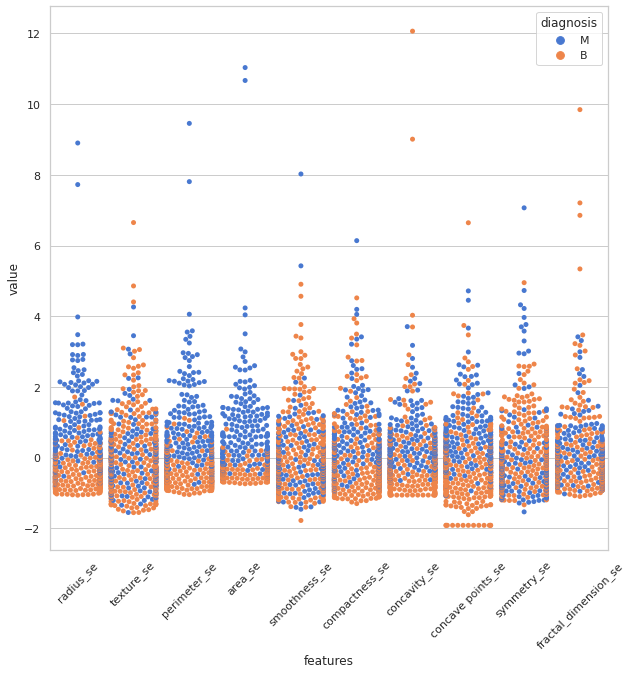

In [16]:
sns.set(style='whitegrid', palette='muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 10:20]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

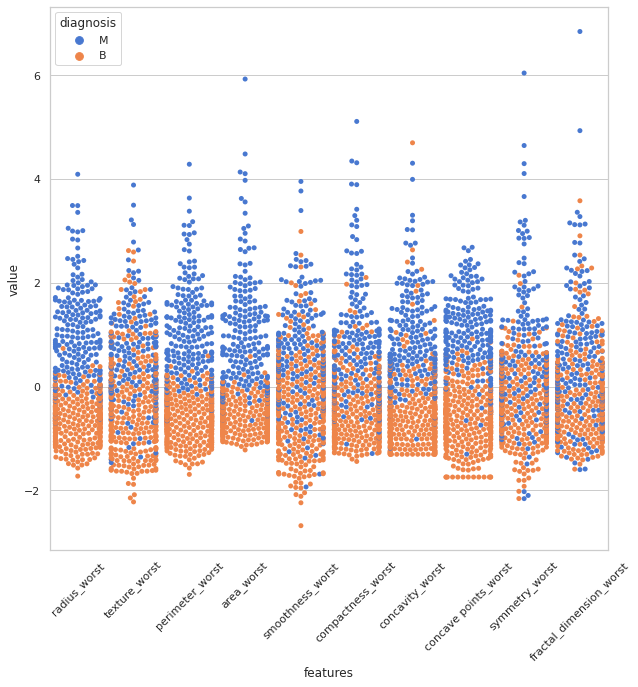

In [17]:
sns.set(style='whitegrid', palette='muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 20:30]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis',
               var_name = 'features',
               value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

# **STEP 8: OBSERVING ALL PAIR-WISE DISTRIBUTION**

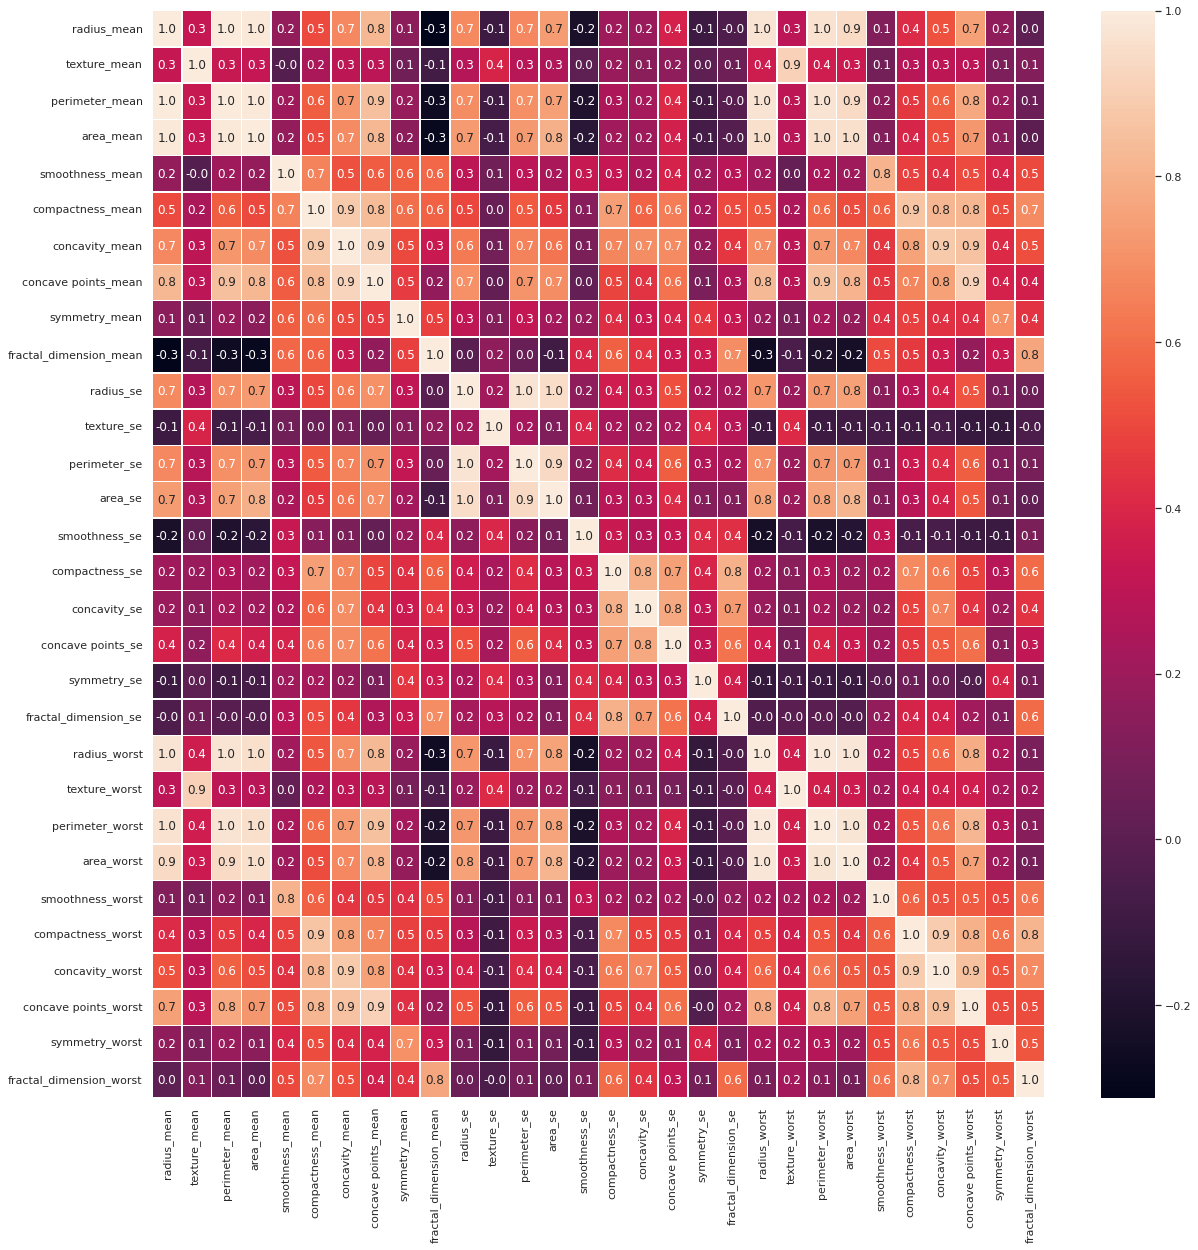

In [18]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

# **STATISTICAL DATA VISUALIZATION WITH SEABORN AND XGBOOST OF BREAST CANCER DIAGNOSIS DATASET**

# **STEP 1: DROPPING CORRRELATED COLUMNS FROM FEATURE MATRIX**

In [19]:
#Selecting the pairs from the above heatmap who result in a correlation of 1

drop_cols = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']
df = x.drop(drop_cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


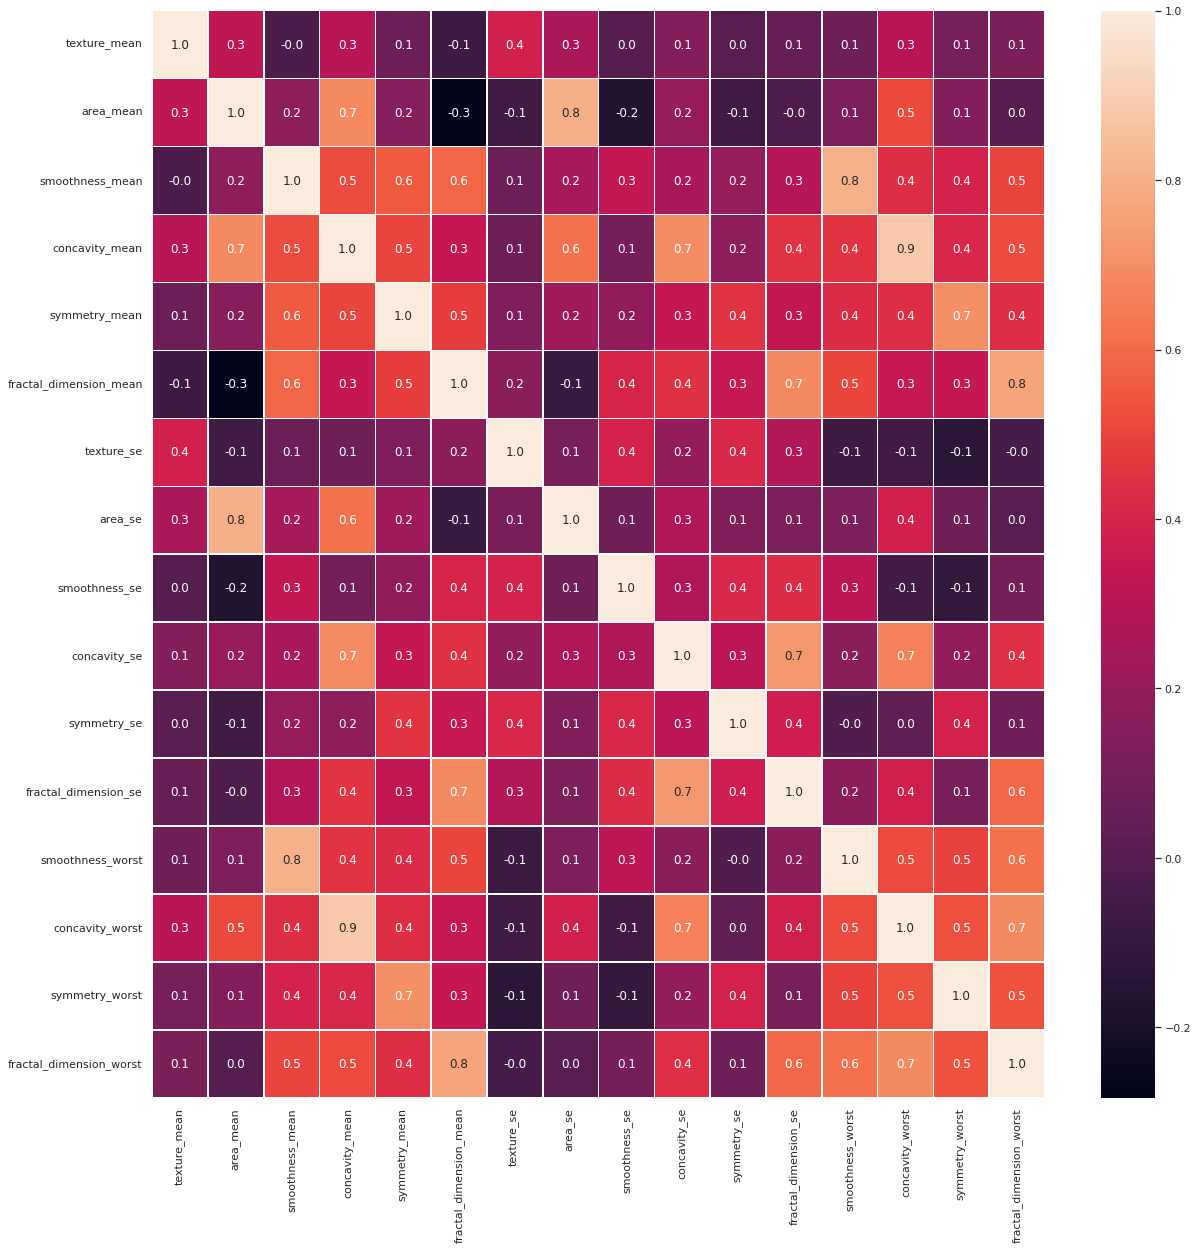

In [21]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

# **STEP 2: CLASSIFICATION USING XGBOOST (MINIMAL FEATURE SELECTION)**

In [22]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

clf_1 = xgb.XGBClassifier(random_state=42)
clf_1 = clf_1.fit(x_train, y_train)

Accuracy is:  0.9766081871345029


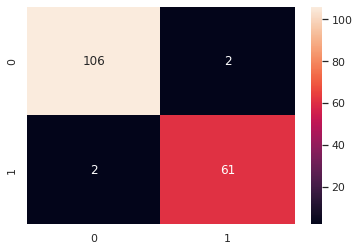

In [24]:
print("Accuracy is: ",accuracy_score(y_test, clf_1.predict(x_test)))
cm = confusion_matrix(y_test, clf_1.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d')

# **STEP 3: UNIVARIATE FEATURE SELECTION AND XGBOOST**

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

print("Score List: ", select_feature.scores_)
print("\n\nFeature List: ", x_train.columns)

Score List:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]


Feature List:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9707602339181286


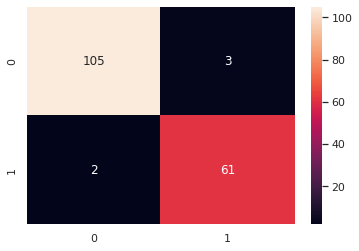

In [27]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_2 = xgb.XGBClassifier().fit(x_train_2, y_train)
print("Accuracy is: ",accuracy_score(y_test, clf_2.predict(x_test_2)))
cm_2 = confusion_matrix(y_test, clf_2.predict(x_test_2))
sns.heatmap(cm_2, annot=True, fmt='d')

# **STEP 4: RECURSIVE FEATURE ELIMINATION WITH CROSS-VALIDATION**

In [28]:
from sklearn.feature_selection import RFECV

clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator = clf_3, step = 1, cv = 5, scoring = 'accuracy', n_jobs = -1).fit(x_train, y_train)

print("Optimal number of Features: ",rfecv.n_features_)
print("\n\nBest Features: ",x_train.columns[rfecv.support_])

Optimal number of Features:  16


Best Features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [32]:
print("Accuracy is: ", accuracy_score(y_test, rfecv.predict(x_test)))

Accuracy is:  0.9766081871345029


# **STEP 5: FEATURE EXTRACTION USING PRINCIPAL COMPONENT ANALYSIS**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_norm = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.mean()) / (x_test.max() - x_test.min())

Text(0, 0.5, 'Cumulative Explained Variance')

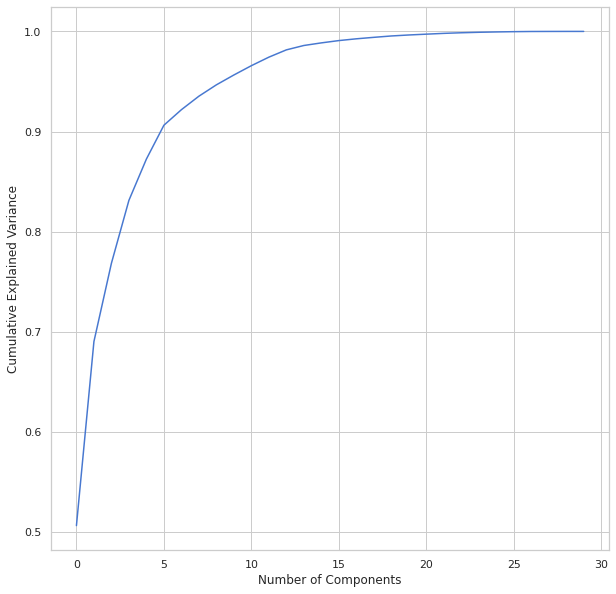

In [49]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_norm)

plt.figure(1, figsize=(10,10))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")